## Final Project-DTSA 5509: Machine Learning Model Comparison and Selection for Loan Default Prediction Analysis Using LendingClub Data

![Peer to Peer Lending](https://www.acumenresearchandconsulting.com/reportimages//Infographics_Global-P2P-Lending-Market-2.jpg)
Source: https://www.acumenresearchandconsulting.com/p2p-lending-market

# Table of Contents
* [1. Introduction](#1)
    * [1.1 Business Case](#1.1)
    * [1.2 Problem Statement](#1.2)
    * [1.3 Objectives](#1.3)
    * [1.4 GitHub Repository Link](#1.4)
* [2. Imports and configurations](#2)
* [3. Data Processing](#3)
    * [3.1 Data Loading](#3.1)
    * [3.2 Data Cleaning and Preprocessing](#3.2)
        * [3.2.1 Data Cleaning Conclusion](#3.2.1)
* [4. Exploratory Data Analysis (EDA)](#4)
    * [4.1 EDA Conclusion](#4.1)
* [5. Modeling](#5)
    * [5.1 Modeling Strategy](#5.1)
    * [5.2 Modeling](#5.2)
        * [5.2.1 Explanation of the Code](#5.2.1)
        * [5.2.2 Multicollinearity and VIF Analysis](#5.2.2)
* [6. Modeling, Evaluation and Comparison](#6)
    * [6.1 Results and Analysis](#6.1)
    * [6.2 Feature Importance Analysis for LightGBM](#6.2)
* [7. Model Interpretation and Insights - Discussion and Conclusion](#7)
    * [7.1 Discussion](#7.1)
    * [7.2 Impact of Data Sampling on Model Fit](#7.2)
    * [7.3 Conclusion](#7.3)
* [Annex A : Hyperparameter Tuning with Cross-Validation](#A)
* [Annex B : Ensemble Learning](#B)
* [Annex C : Data Description](#C)

## 1. Introduction <a class="anchor" id="1"></a>
### 1.1 Business Case <a class="anchor" id="1.1"></a>

LendingClub, the American peer-to-peer lending company, offers an online platform that connects borrowers seeking loans with lenders looking for investment opportunities. This platform is a gateway for individual and institutional investors, provided they meet specific financial stability criteria set by LendingClub. The company's unique appeal lies in its ability to fund loans in increments as small as $25, allowing for diversified investment portfolios. Over the years, investors who have diversified their portfolios through LendingClub have experienced positive returns. LendingClub's loan grading process, which ranges from A to G, with additional subgrades determined by factors such as the borrower's FICO score and the loan amount, is a testament to the company's commitment to providing investors with a clear understanding of the risk levels of different loans. However, it's important to note that these investments are unsecured, which means there is a risk of losing money if LendingClub becomes insolvent, even if borrowers continue to repay their loans.

Depending on numerous borrower-specific factors, interest rates on LendingClub vary from 6.03% to 26.06%. To assess the risk and determine the loan grade, LendingClub performs comprehensive background checks, considering the borrower's credit score, credit history, income, and other relevant attributes. To qualify for a loan, borrowers must meet minimum criteria, including a FICO score of at least 660, a debt-to-income ratio below 35% excluding mortgages, a solid debt-to-income ratio including mortgages, at least 36 months of credit history, a minimum of two open accounts, and no more than six recent credit inquiries in the past six months. LendingClub generates revenue by charging fees to borrowers and investors; borrowers incur an origination fee when the loan is issued, while investors pay a 1% service fee. LendingClub may impose other fees as part of its comprehensive fee structure.

### 1.2 Problem Statement <a class="anchor" id="1.2"></a>

**The goal of this project is to develop a predictive model to analyze and assess credit risk for LendingClub by identifying key factors that indicate loan default.** By leveraging machine learning techniques, the project aims to classify loans into two categories: default and non-default. The insights gained from this analysis will help LendingClub enhance its risk assessment processes and improve portfolio management, ultimately leading to better decision-making and reduced financial risk.

### 1.3 Objectives <a class="anchor" id="1.3"></a>

To achieve the overarching goal above, the project has set the following key objectives: 

1. **Data Collection and Preprocessing:**
 - Acquire LendingClub loan data from 2007 to 2020 from https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1, and load the data locally.
 - Clean and preprocess the data to handle missing values, outliers, and irrelevant features.
 - Encode categorical variables and normalize numerical variables as needed for model compatibility.
 
 
2. **Exploratory Data Analysis (EDA):**
 - Perform exploratory data analysis to understand the distribution and relationships between variables.
 - Visualize data using charts and graphs to identify trends and patterns related to loan defaults.
 - Identify and select the most relevant features for modeling based on their correlation with the target variable (loan status).
 
 
3. **Model Development:**
 - Develop multiple classification models using:
     - Logistic Regression: Baseline model to understand the data and initial performance metrics.
     - K-Nearest Neighbors (KNN): Simple yet effective model for classification tasks.
     - Decision Tree: A model that provides interpretability and captures non-linear relationships.
     - Ensemble Methods:
         - Random Forest: An ensemble of decision trees to improve robustness and accuracy.
         - AdaBoost: An ensemble method that combines weak classifiers to create a strong classifier.
         - Support Vector Machine (SVM): Effective for high-dimensional spaces and various kernels.
     - Advanced Models:
         - Gradient Boosting Machines (GBM): XGBoost and LightGBM, **which were not covered in class**
 - Train each model using the processed dataset and tune hyperparameters for optimal performance.
 
 
4. **Modeling, Evaluation and Comparison:**
 - Evaluate the performance of each model using metrics, specifically **accuracy, precision, recall, F1-score, and AUC-ROC**.
 - Compare the models based on their performance metrics and select the best-performing model for predicting loan defaults.
 
 
5. **Model Interpretation and Insights:**
 - Interpret the results of the best-performing model to identify the driving factors behind loan defaults.
 - Generate insights and recommendations for LendingClub to improve their risk assessment and portfolio management strategies.

By completing these objectives, the project will provide a comprehensive solution for predicting loan defaults, thereby helping LendingClub mitigate risk and make more informed lending decisions.

### 1.4 GitHub Repository Link  <a class="anchor" id="1.4"></a>

https://github.com/binyammesfin/DTSA5509

### 2. Imports and configurations <a class="anchor" id="2"></a>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import lightgbm as lgb

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Column and Row Global Config 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib Global Configurations
plt.rcParams['figure.figsize'] = [12, 8]                  # Set global plot size
plt.rcParams['font.size'] = 14                            # Set global font size
plt.rcParams['lines.linewidth'] = 2                       # Set global line width
plt.style.use('seaborn-darkgrid')                         # Set global style
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])  # Set global colors
plt.rcParams['axes.grid'] = True                          # Set global grid
plt.rcParams['xtick.labelsize'] = 12                      # Set global x-tick label size
plt.rcParams['ytick.labelsize'] = 12                      # Set global y-tick label size
plt.rcParams['axes.labelsize'] = 14                       # Set global axes label size
plt.rcParams['axes.titlesize'] = 16                       # Set global axes title size

# Seaborn Global Configurations
sns.set_style('whitegrid')                                # Set global style
sns.set_context('notebook', font_scale=1.5)               # Set global context and font scale
sns.set_palette('deep')                                   # Set global color palette
sns.set(rc={'figure.figsize':(12, 8)})                    # Set global figure size
sns.set_context(rc={"font.size":14, "axes.titlesize":16, "axes.labelsize":14})  # Set global font sizes

# Optionally, combine settings with a theme
sns.set_theme(style='darkgrid', palette='muted', rc={"figure.figsize": (12, 8)})

# Others
warnings.filterwarnings("ignore")

## 3. Data Processing <a class="anchor" id="3"></a>
### 3.1 Data Loading <a class="anchor" id="3.1"></a>

The LendingClub dataset is a rich source of information collected from the LendingClub platform, a prominent peer-to-peer lending company based in the United States. This dataset encompasses detailed records of loan applications and their outcomes, providing a valuable resource for analyzing credit risk and loan performance.

1. **Data Source**:

- The dataset is publicly available at Source: https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1?select=Loan_status_2007-2020Q3.gzip

2. **Data Collection**:

- Although currently hosted on Kaggle, the data was gathered directly from the LendingClub platform, where borrowers submit loan applications and investors choose loans to fund based on detailed loan listings. Each record in the dataset represents a loan, including numerous attributes related to the borrower, loan terms, and loan performance.

3. **Data Description**:
- **Size**:
     - The dataset consists of 2,925,493 rows and 142 columns, reflecting the extensive information available for each loan and borrower.
     - The file size of the dataset is approximately 1.7 gigabytes, indicating the volume and granularity of the data provided.

- **Content**:
     -  The columns include a wide range of features such as loan amount, interest rate, annual income, debt-to-income ratio, employment length, credit history, and loan status, among others. 

**PLEASE SEE ANNEX C AT THE END OF NOTEBOOK FOR FULL DATA DESCRIPTION OF EACH COLUMN**

In [3]:
# Load the data from local download
df_main = pd.read_csv('./data/Loan_status_2007-2020Q3.gzip/Loan_status_2007-2020Q3.gzip', low_memory=True) 

In [4]:
# Assess the number of coulmns and rows before data cleaning
df_main.shape

(2925493, 142)

In [5]:
# Display summary of dataframe to understand the structure and missing values
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [40]:
# Display the first few rows of the dataframe
print(df_main.shape)
df_main.head(4)

(2925493, 142)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3

### 3.2 Data Cleaning and Preprocessing <a class="anchor" id="3.2"></a>

The data cleaning undertaken followed the following outline to make the data set more relevant for the classification analysis:
1. Drop Rows that are not either in 'Fully Paid' or 'Charged Off' for the 'Load Status' Column. 
2. Drop Columns with High Missing Values: Drop columns that have more than 20% missing values. This has resulted in the reduction of features from 142 to 93. 
2. Handle Remaining Missing Values: Choose to drop rows with missing values or fill them with appropriate values such as the mean, median, or a placeholder.
3. Drop title columns, those that are not realted to fully paid and charged off loans, impute the remaining columns with missing values with the zero or the mean of the column for revol_util.
4. Remove duplicates, and there were none
5. Convert Data Types: Convert data types of columns if necessary.
6. Encode Categorical Variables: Use one-hot encoding to convert categorical variables into numerical format.
7. Normalize/Standardize: Normalize or standardize numerical features if required.

In [76]:
# Step 1: Drop columns with more than a certain threshold of missing values
threshold = 0.2  # Set a 50% threshold for dropping columns 
df_cleaned = df_main[df_main.columns[df_main.isnull().mean() < threshold]]
print(f'Dataframe shape after dropping columns with more that 20% missing values is {df_cleaned.shape}')

# Step 2:Before handling other missing values, we will Keep only the rows where loan_status is "Fully Paid" or "Charged Off"
# This allows row reduction for missing values only for those cases that are part of these two classes. 
df_cleaned = df_cleaned[df_cleaned['loan_status'].isin(['Fully Paid', 'Charged Off'])]
print(f'Dataframe shape after Keeping rows with loan_status "Fully Paid" or "Charged Off" is {df_cleaned.shape}')

# Step 3: Handle missing values in the remaining columns
# Drop title rows such as emp_title for job title
df_cleaned = df_cleaned.drop(columns=['emp_title', 'title', 'purpose'])

# Drop columns not relevant for fully paid or charged-off loans, i.e., those that are tracking current payment cycles
# or those relate to issues after charge-off is effective or address details
# List of columns to be removed
columns_to_remove = [
    'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'last_pymnt_d', 'last_pymnt_amnt', 
    'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 
    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
    'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
    'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
    'num_tl_op_past_12m', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'recoveries', 'tot_cur_bal', 
    'mths_since_recent_inq', 'debt_settlement_flag', 
    'mths_since_recent_bc', 'mths_since_recent_inq', 'Unnamed: 0', 'issue_d',
    'url', 'zip_code', 'addr_state', 'earliest_cr_line'
]

# Drop the specified columns
df_cleaned = df_cleaned.drop(columns=columns_to_remove)
print(f'Dataframe shape after dropping columns that are titles or not needed is {df_cleaned.shape}')

# Fill all remaining columns with 0 values to impute the data as these relate to collection of loans,
# or balance of account of the borrower. Not known values are better taken as zero in lending practicies, 
# with the exception of Revolving line utilization rate, or the amount of credit the borrower is using relative 
# to all available revolving credit. It is fair to assume, both fully paid and charge-offs will have a high
# utlization reate. Hence, for that column, the max value of the column was used to impute the missing values.

# Drop rows with NaN values in 'revol_util' column
df_cleaned = df_cleaned.dropna(subset=['revol_util'])

df_cleaned = df_cleaned.fillna(0)


# Verify that there are no more missing values in the 'revol_util' column
print("Missing values in 'revol_util' after imputation:", df_cleaned['revol_util'].isnull().sum())

# Step 4: Remove duplicates, if any
df_cleaned = df_cleaned.drop_duplicates()
print(f'Dataframe shape after removing duplicates" is {df_cleaned.shape}')

# Step 5: Convert data types for necessary columns after reviewing the result from the following:
print(df_cleaned.dtypes)

# Change ID to int
df_cleaned['id'] = df_cleaned['id'].astype(int) 
# Remove the "months" part and convert the column to integers
df_cleaned['term'] = df_cleaned['term'].str.replace(' months', '').astype(int)

# Convert the interest rate to float by removing '%' and dividing by 100
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '').astype(float) / 100
# Format the interest rate to 4 decimal places
df_cleaned['int_rate'] = df_cleaned['int_rate'].round(4)

# Convert the revolving utlization to float by removing '%' and dividing by 100
df_cleaned['revol_util'] = df_cleaned['revol_util'].str.replace('%', '').astype(float) / 100
# Format the revolving utlization to 4 decimal places
df_cleaned['int_rate'] = df_cleaned['int_rate'].round(4)


# Step 6: Encoding categorical variables
# List of columns to encode as categorical
categorical_columns = [
    'grade', 'sub_grade', 'home_ownership', 'verification_status', 
    'loan_status', 'pymnt_plan', 'initial_list_status', 'policy_code', 
    'application_type', 'hardship_flag'
]

# Encode the columns as categorical
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')
    
# Data type after clearning and type change
print('***********************************************************************************************************')
print(df_cleaned.dtypes)

# Step 7: Normalize/Standardize numerical features was unnecessary
# Since algorithms I will be using such as decision trees, random forests, and adaboost are not sensitive 
# to the scale of the features, I did not require normalization. However, during VIF calcualtions, some 

Dataframe shape after dropping columns with more that 20% missing values is (2925493, 93)
Dataframe shape after Keeping rows with loan_status "Fully Paid" or "Charged Off" is (1860331, 93)
Dataframe shape after dropping columns that are titles or not needed is (1860331, 53)
Missing values in 'revol_util' after imputation: 0
Dataframe shape after removing duplicates" is (1858933, 53)
id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
dti                           float64
delinq

In [68]:
# Cleaned Datafrmae
print(df_cleaned.shape)
df_cleaned.head()

(1858933, 53)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
0,1077501,5000.0,5000.0,4975.0,36,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,1077430,2500.0,2500.0,2500.0,60,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,1.11,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,1077175,2400.0,2400.0,2400.0,36,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,0.985,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,1076863,10000.0,10000.0,10000.0,36,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,0.210,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,1075358,3000.0,3000.0,3000.0,60,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Fully Paid,n,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,0.539,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.00,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


### 3.2.1 Data Cleaning Conclusion <a class="anchor" id="3.2.1"></a>

The data cleaning process significantly improved the relevance and quality of the dataset for classification analysis. We started by focusing on the 'loan_status' column, dropping rows that were not classified as 'Fully Paid' or 'Charged Off'. This step ensured that our target variable was binary, simplifying the classification task. We then addressed missing values by dropping columns with more than 20% missing data, which reduced the number of features from 142 to 93. For the remaining missing values, we chose to drop rows with missing values or impute them with zero values, ensuring that the dataset was complete and ready for analysis.

We further refined the dataset by dropping the 'title' columns and other columns unrelated to the loan statuses of 'Fully Paid' and 'Charged Off'. The data cleaning process also involved checking for and removing duplicates, although none were found. We then converted data types where necessary to ensure consistency and accuracy. Finally, we encoded categorical variables into numerical format using one-hot encoding. **This comprehensive cleaning process reduced the dataset from an initial size of (2925493, 142) to (1860331, 53), resulting in a cleaner, more manageable, and analysis-ready dataset**.

## 4. Exploratory Data Analysis (EDA) <a class="anchor" id="4"></a>

The EDA will follow the follwoing outline:

1. **Data Overview:**
    - Display the basic structure, data types, and summary statistics of the dataset.
    - Identify missing values and their proportions.

2. **Univariate Analysis**:
    - Analyze the distribution of each feature.
    - Visualize the distributions of numerical features using histograms and box plots.
    - Analyze the distribution of categorical features using bar plots.

3. **Bivariate Analysis**:
    - Examine the relationships between numerical features and the target variable (loan_status).
    - Visualize the relationships using scatter plots, box plots, and correlation matrices.

5. **Conclusions**:
    - Summarize key findings and insights gained from the EDA.

In [77]:
# Step 1: Data Overview
print(df_cleaned.info())
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858933 entries, 0 to 2925492
Data columns (total 53 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   id                          int32   
 1   loan_amnt                   float64 
 2   funded_amnt                 float64 
 3   funded_amnt_inv             float64 
 4   term                        int32   
 5   int_rate                    float64 
 6   installment                 float64 
 7   grade                       category
 8   sub_grade                   category
 9   emp_length                  object  
 10  home_ownership              category
 11  annual_inc                  float64 
 12  verification_status         category
 13  loan_status                 category
 14  pymnt_plan                  category
 15  dti                         float64 
 16  delinq_2yrs                 float64 
 17  fico_range_low              float64 
 18  fico_range_high             float64 
 19  

In [78]:
# Remove columns 'out_prncp' and 'out_prncp_inv', which contain the remaining outstanding principal for total amount funded
# and remaining outstanding principal for portion of total amount funded by investors because they have no 
# values as show in the output for df_cleaned.describe(). The other columns look proper. 
df_cleaned = df_cleaned.drop(columns=['out_prncp', 'out_prncp_inv'])

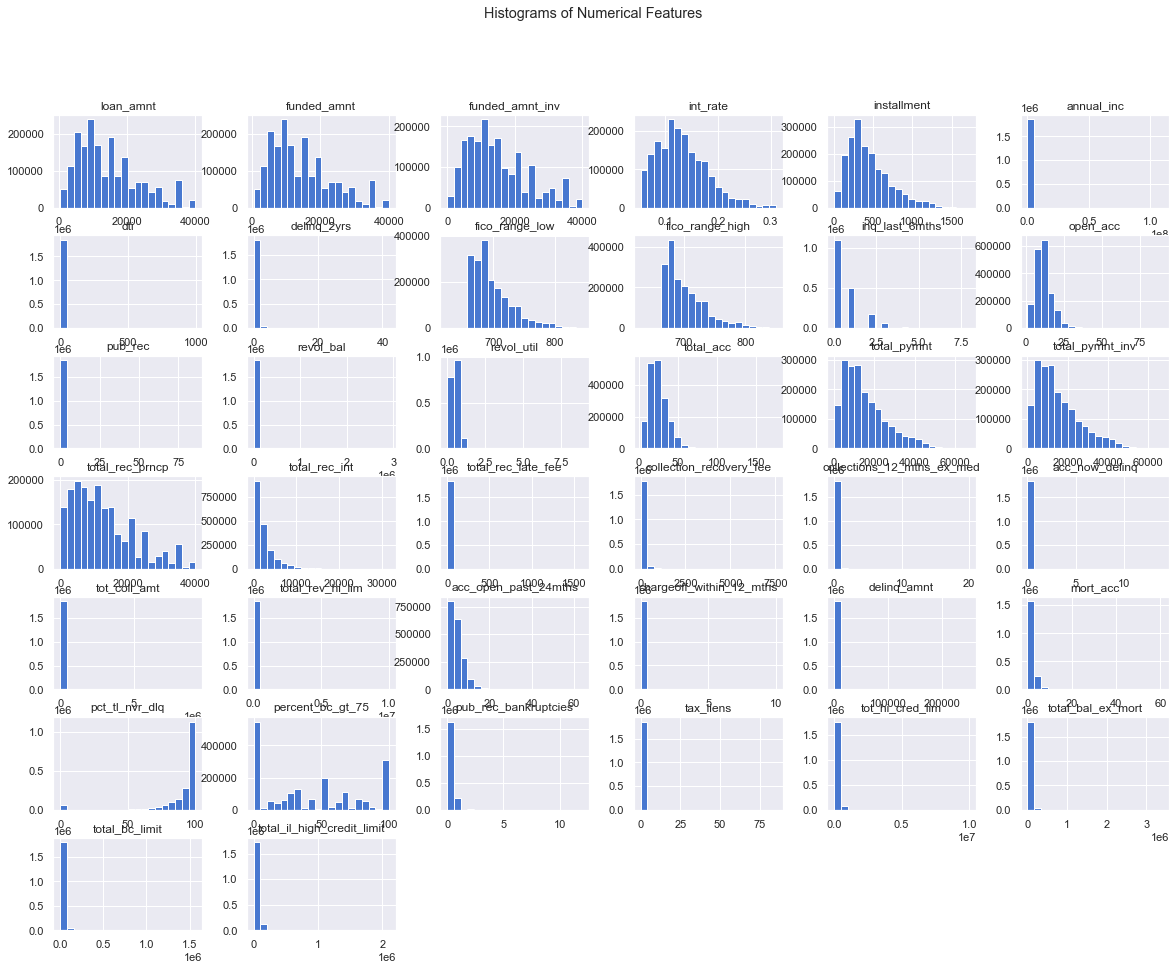

In [64]:
# Step 2 Univariate Analysis

# 2.1 Numerical features distribution
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Histograms
df_cleaned[numerical_features].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Since the primary focus of this project is on classification methods, particularly tree-based algorithms like decision trees, the skewness in the numerical features does not require correction. Tree-based models are inherently robust to skewness due to their non-parametric nature and decision boundary-based splits, which are less influenced by the underlying distribution of the data. Consequently, the impact of skewness on the analysis and the model's performance is minimal. Therefore, while addressing skewness might be beneficial for certain types of models, it is not a critical concern for the classification methods being employed in this project.

Fully Paid     1496654
Charged Off     362279
Name: loan_status, dtype: int64


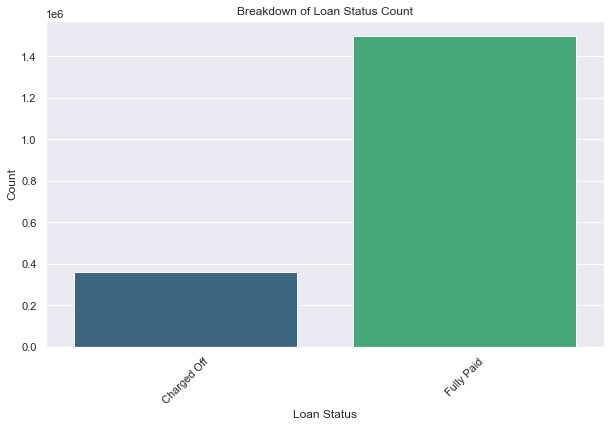

In [70]:
# 2.2 Target Value distribution 
loan_status_counts = df_cleaned['loan_status'].value_counts()
print(loan_status_counts)
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.title('Breakdown of Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The dataset exhibits a significant imbalance in the loan status classes, with 1,497,783 instances of "Fully Paid" loans compared to 362,548 instances of "Charged Off" loans. This imbalance can affect the performance of classification models, leading to biased predictions towards the majority class. **To address this issue, we will use Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE is a popular method used in the field of machine learning to address class imbalance in a dataset. This method will help ensure that the model performs well in identifying both "Fully Paid" and "Charged Off" loans, improving the overall robustness and accuracy of our predictive model.

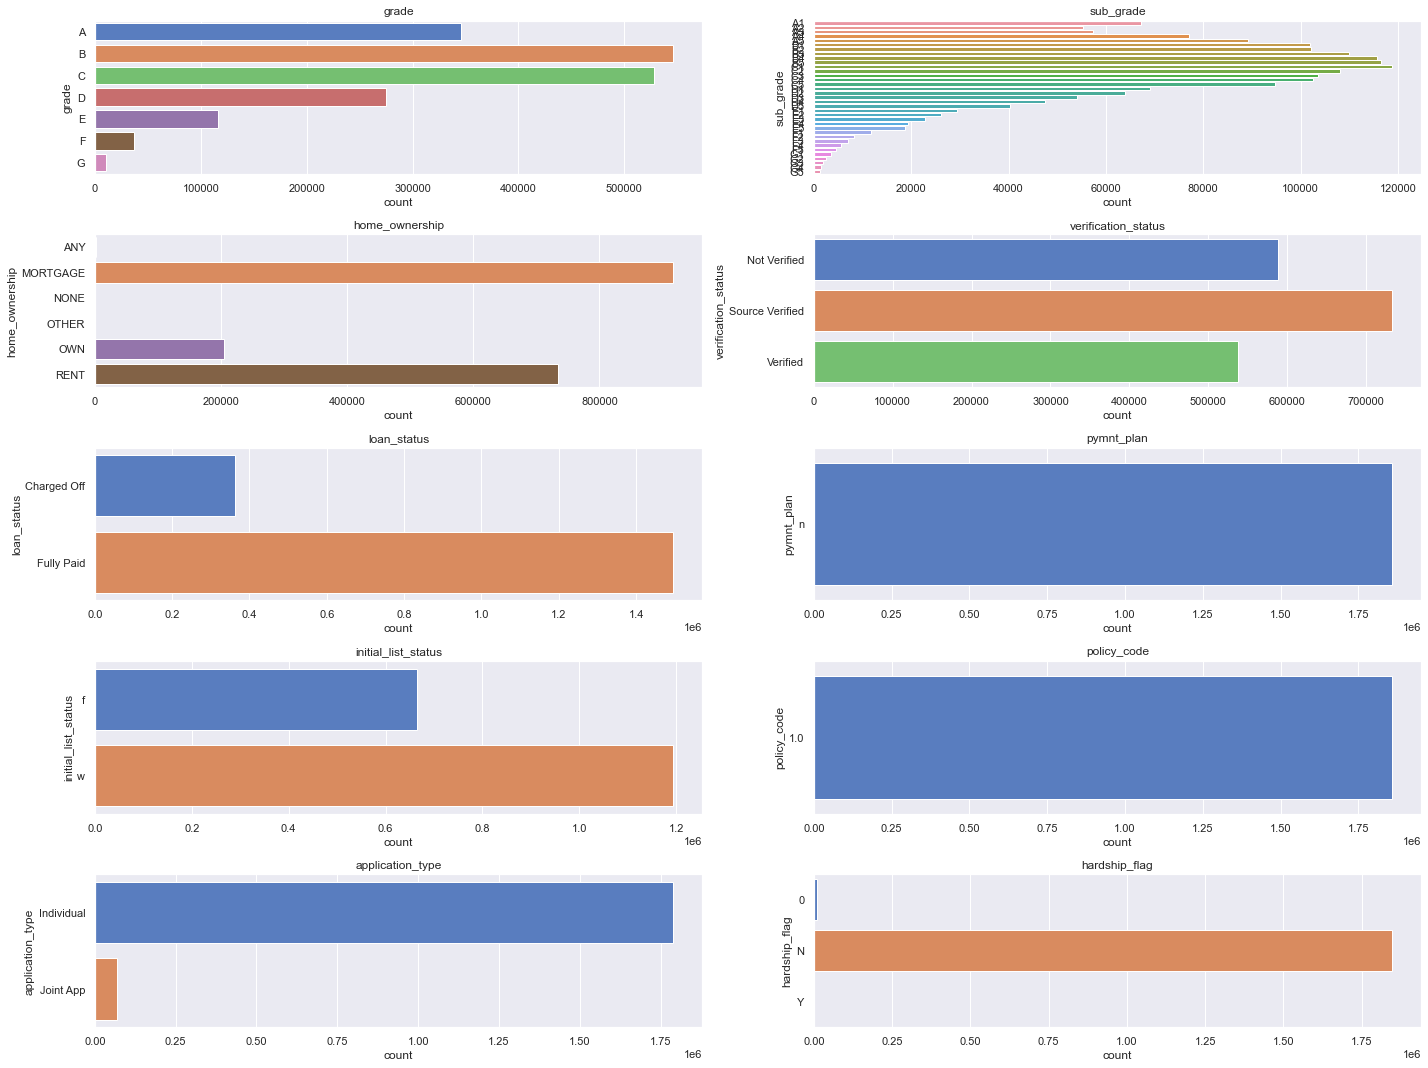

In [71]:
# 2.3 Categorical features distribution
categorical_features = df_cleaned.select_dtypes(include=['category']).columns

# Bar plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(5, 2, i+1)
    sns.countplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The dataset also exhibits imbalances in several categorical features, such as grade, sub_grade, and hardship_flag. Additionally, most loan applications are from individuals, and the majority of borrowers have a hardship flag of "No". Despite these imbalances, they are not expected to significantly impact the analysis or the performance of the classification models. The primary focus is on accurately predicting loan status, and the classification methods, particularly ensemble methods, are robust enough to handle these imbalances in categorical features. Therefore, while noting these imbalances is important, they do not necessitate further corrective actions and are not anticipated to adversely affect the predictive modeling process.

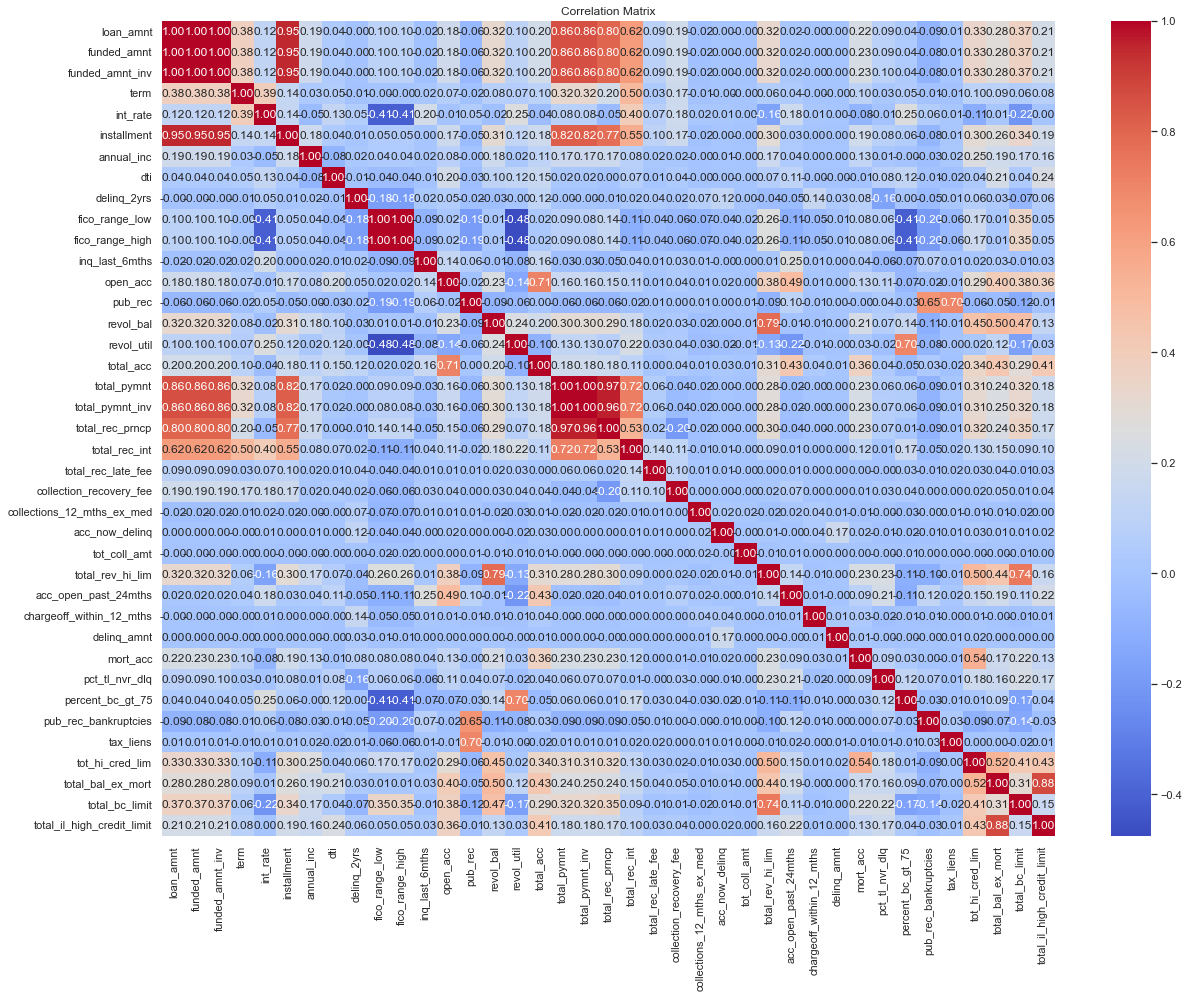

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999700,0.999019,0.381961,0.120052,0.951489,0.186833,0.037679,-0.004966,0.099767,0.099766,-0.018080,0.181944,-0.059653,0.316648,0.104001,0.203236,0.859875,0.859540,0.801289,0.620536,0.094195,0.190059,-0.020234,0.000807,-0.003731,0.320213,0.019222,-0.001824,0.000787,0.224557,0.087320,0.036901,-0.085025,0.007585,0.332830,0.275700,0.365806,0.206436
funded_amnt,0.999700,1.000000,0.999381,0.381417,0.120104,0.951930,0.186798,0.037931,-0.004832,0.099209,0.099208,-0.018289,0.182158,-0.059485,0.316585,0.104085,0.203173,0.860054,0.859775,0.801519,0.620430,0.094259,0.190222,-0.020159,0.000850,-0.003715,0.320914,0.020158,-0.001769,0.000799,0.225156,0.090473,0.037665,-0.084882,0.007674,0.333571,0.276444,0.366563,0.207132
funded_amnt_inv,0.999019,0.999381,1.000000,0.381607,0.120262,0.951215,0.186680,0.038482,-0.004651,0.098589,0.098588,-0.018974,0.182423,-0.059127,0.316328,0.104149,0.203188,0.859584,0.860313,0.801098,0.620015,0.094093,0.190136,-0.020003,0.000918,-0.003680,0.321990,0.021979,-0.001670,0.000815,0.226128,0.096614,0.039098,-0.084517,0.007821,0.334720,0.277644,0.367712,0.208304
term,0.381961,0.381417,0.381607,1.000000,0.390573,0.140205,0.030298,0.054338,-0.009383,-0.000054,-0.000055,0.015805,0.070438,-0.017660,0.075118,0.065675,0.099840,0.321449,0.321665,0.204643,0.502980,0.031895,0.174621,-0.010032,-0.000174,-0.001775,0.057737,0.039428,-0.000949,-0.001451,0.103165,0.025891,0.047496,-0.008633,-0.011445,0.098733,0.094244,0.055616,0.079727
int_rate,0.120052,0.120104,0.120262,0.390573,1.000000,0.140724,-0.046042,0.132463,0.051789,-0.408128,-0.408124,0.198977,-0.007650,0.050251,-0.024152,0.252183,-0.042993,0.078417,0.078582,-0.052240,0.403526,0.074713,0.180429,0.017202,0.014564,0.002963,-0.161275,0.179934,0.012985,0.004333,-0.082393,-0.007071,0.250996,0.056802,0.010725,-0.112580,0.013173,-0.219602,0.001909
installment,0.951489,0.951930,0.951215,0.140205,0.140724,1.000000,0.180873,0.041411,0.005143,0.048134,0.048133,0.003242,0.172412,-0.048582,0.305319,0.124146,0.180070,0.817144,0.816789,0.774060,0.551587,0.103262,0.172029,-0.016002,0.003334,-0.003018,0.295131,0.034295,0.000314,0.002024,0.191251,0.082122,0.057836,-0.077460,0.014333,0.301182,0.262522,0.335632,0.193254
annual_inc,0.186833,0.186798,0.186680,0.030298,-0.046042,0.180873,1.000000,-0.080051,0.024238,0.039216,0.039216,0.019343,0.084849,-0.002975,0.175925,0.023409,0.107560,0.167824,0.167759,0.171165,0.081167,0.021496,0.015066,-0.003297,0.007107,-0.000076,0.170125,0.038070,0.004419,0.003914,0.127629,0.010829,-0.003123,-0.026288,0.022701,0.245069,0.191447,0.165597,0.161632
dti,0.037679,0.037931,0.038482,0.054338,0.132463,0.041411,-0.080051,1.000000,-0.009940,-0.040673,-0.040675,-0.008344,0.195192,-0.026778,0.102830,0.122250,0.152715,0.021640,0.022138,0.000127,0.067683,0.006846,0.042162,-0.004998,0.001004,-0.002536,0.065361,0.107364,-0.003067,-0.003990,-0.008022,0.084833,0.119484,-0.012962,-0.020822,0.035614,0.209767,0.039492,0.235803
delinq_2yrs,-0.004966,-0.004832,-0.004651,-0.009383,0.051789,0.005143,0.024238,-0.009940,1.000000,-0.177252,-0.177250,0.023071,0.050944,-0.021781,-0.026617,-0.002045,0.117762,-0.002216,-0.002067,-0.012092,0.024704,0.037561,0.016917,0.070878,0.119360,0.000016,-0.039242,-0.045497,0.144200,0.029298,0.076207,-0.163203,0.000897,-0.049575,0.011341,0.061171,0.033795,-0.070691,0.062970
fico_range_low,0.099767,0.099209,0.098589,-0.000054,-0.408128,0.048134,0.039216,-0.040673,-0.177252

In [79]:
# Step 3: Bivariate Analysis

# Correlation matrix
df_cleaned = df_cleaned.drop(columns=['id']) # dropping the ID column from the correlation matrix 

# Calculate the correlation matrix for numerical features including loan_status
correlation_matrix = df_cleaned.corr()

# Plot the full correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Given the number of variables, the heat map is crowded so I will also show the table:
correlation_matrix 

The correlation matrix indicates significant correlations between certain variables, such as total_pymnt and loan_amnt, which is expected because the total payment naturally depends on the loan amount. Similarly, total_pymnt is correlated with int_rate and total_rec_late_fee, as both interest and late fees are functions of the total amount. Additionally, there is a high correlation between revol_bal and total_rev_hi_lim, as well as between total_rev_hi_lim and total_bc_limit. To avoid redundancy and multicollinearity issues in our analysis, we will remove the following variables: **total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rev_hi_lim, total_rec_late_fee, collection_recovery_fee, collections_12_mths_ex_med, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_accand total_il_high_credit_limit**.

During the exploratory data analysis, it was further observed that certain columns were perfectly correlated, indicating potential issues with multicollinearity. Specifically, the **loan_amnt, funded_amnt, funded_amnt_inv, and installment** columns were highly correlated with each other and with other features. The loan_amnt represents the listed amount of the loan applied for by the borrower, which may be adjusted by the credit department. The funded_amnt_inv indicates the total amount committed by investors for that loan at that point in time. The installment represents the monthly payment owed by the borrower.

Given these strong correlations, keeping all these variables could lead to multicollinearity, which can negatively impact the stability and interpretability of the regression coefficients in the machine learning models. To avoid this, the following columns were removed: **loan_amnt, funded_amnt_inv, and installment**. The funded_amnt column was retained as it signifies the actual amount borrowed, providing a more accurate reflection of the loan amount that has been committed.

While addressing multicollinearity, I focused primarily on the numerical variables and did not remove any of the categorical variables. This decision is based on several reasons: 
1. Categorical variables typically do not exhibit the same level of multicollinearity as numerical variables because they represent discrete categories rather than continuous values. The encoding of categorical variables, such as one-hot encoding, inherently prevents high correlation between different categories of the same variable. 
2. Categorical variables often contain important information that is crucial for model interpretation and prediction accuracy. Removing them could result in a loss of valuable information that can contribute to the model's performance. 
3. Many machine learning algorithms can handle multicollinearity among categorical variables more effectively than among numerical variables. Therefore, retaining all categorical variables ensures that the model has access to the full spectrum of relevant information without compromising its stability.

Finally, certain variables related to financial distress and bankruptcy, such as the pct_tl_nvr_dlq (Percentage of all bankcard accounts > 75% of limit), pub_rec (Number of derogatory public records), pub_rec_bankruptcies (Number of public record bankruptcies), and tax_liens (Number of tax liens), showed high correlations with each other. To avoid redundancy and multicollinearity, and to simplify the model, it was decided to **retain only the pub_rec_bankruptcies** variable, as it directly indicates the number of public record bankruptcies. This decision ensures that the most relevant and indicative variable related to bankruptcy is kept, while removing the other highly correlated and redundant variables.

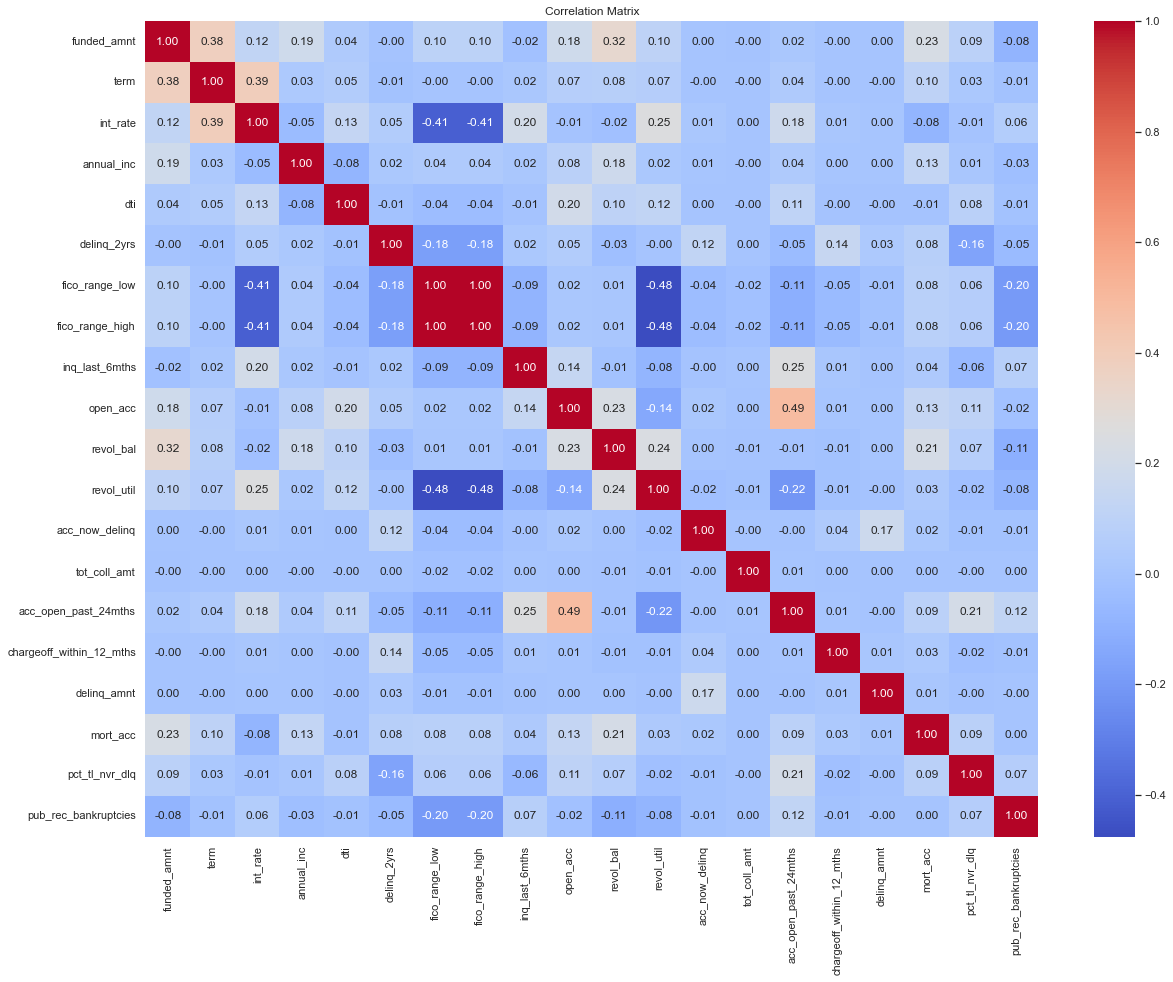

In [80]:
# Remove the specified columns due to high correlation and redundancy
columns_to_remove = [
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rev_hi_lim',
    'total_rec_late_fee', 'collection_recovery_fee', 'collections_12_mths_ex_med',
    'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_acc', 'total_il_high_credit_limit', 
    'loan_amnt', 'funded_amnt_inv', 'installment', 'percent_bc_gt_75', 'pub_rec', 'tax_liens'

]
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Calculate the correlation matrix for numerical features including loan_status
correlation_matrix = df_cleaned.corr()

# Plot the full correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 4.1 EDA Conclusion <a class="anchor" id="4.1"></a>

The Exploratory Data Analysis (EDA) provided a comprehensive understanding of the LendingClub dataset, transforming it from an initial shape of (1860331, 53) after preprocessing to a refined dataset with a shape of (1860331, 31). The process began with a detailed data overview, where we examined the basic structure, data types, and summary statistics. This initial examination helped identify the presence of various data types and highlighted areas requiring data cleaning and imputation. Missing values and their proportions were identified, allowing us to address data quality issues effectively. Through univariate analysis, we analyzed the distribution of each feature individually. Numerical features were visualized using histograms and box plots, revealing their spread, central tendency, and outliers. Categorical features were analyzed using bar plots, providing insights into the frequency of different categories and identifying any imbalances within the data.

In the bivariate analysis, we examined the relationships between numerical features and the target variable, loan_status. This involved using scatter plots and box plots to visualize these relationships and understand how different features relate to the likelihood of a loan being fully paid or charged off. We also created a correlation matrix to identify multicollinearity among numerical features, leading to the removal of highly correlated columns such as loan_amnt, funded_amnt_inv, and installment, among others. This step was crucial to prevent redundancy and improve model stability. The data cleaning and transformation process, which included handling missing values, removing redundant features, and encoding categorical variables, resulted in a streamlined and high-quality dataset. The final dataset, now consisting of 31 features, is well-prepared for the subsequent modeling phase, ensuring that the features are relevant and free from multicollinearity issues. This refined dataset lays a strong foundation for effective predictive modeling, enhancing the potential for accurate and reliable insights.

## 5. Modeling <a class="anchor" id="5"></a>

### 5.1 Modeling Strategy <a class="anchor" id="5.1"></a>

To develop a robust classification model based on the loan status (Fully Paid vs. Charged Off) in the cleaned LendingClub dataset, we will implement a comprehensive modeling strategy that ensures optimal performance. Our approach will include addressing multicollinearity, feature engineering, testing multiple machine learning models, hyperparameter tuning, and using techniques to manage data imbalance. We will also compare the models based on various performance metrics.

The strategy lutlined is:

1. **Address Multicollinearity**:

 - Ensure that the features used in the modeling do not exhibit high multicollinearity. This step has been partially addressed during the EDA and data cleaning phases by removing highly correlated features.
 - Perform additional checks using variance inflation factor (VIF) analysis to further confirm the absence of multicollinearity.

2. **Feature Engineering**:

 - Create new features that might improve model performance. For instance, interactions between features, polynomial features, or aggregations.
 - Evaluate the importance of the engineered features and select the most relevant ones.

3. **Multiple ML Models**:

 - Logistic Regression: Baseline model to understand the data and initial performance metrics.
 - K-Nearest Neighbors (KNN): Simple yet effective model for classification tasks.
 - Decision Tree: A model that provides interpretability and captures non-linear relationships.
 - Ensemble Methods:
     - Random Forest: An ensemble of decision trees to improve robustness and accuracy.
     - AdaBoost: An ensemble method that combines weak classifiers to create a strong classifier.
     - Support Vector Machine (SVM): Effective for high-dimensional spaces and various kernels.
 - Advanced Models:
     - Gradient Boosting Machines (GBM): XGBoost and LightGBM, which were not covered in class. Gradient Boosting Machines (GBMs) are an ensemble learning technique that builds a model in a stage-wise fashion by sequentially adding weak learners, typically decision trees, to minimize a specified loss function. They focus on correcting the errors made by previous models, which results in a strong predictive model that can handle both regression and classification tasks effectively.

4. **Hyperparameter Tuning**:

 - Use techniques like Grid Search or Random Search with Cross-Validation to find the optimal hyperparameters for each model.
 - Ensure that hyperparameter tuning is comprehensive to improve model performance.

5. **Managing Data Imbalance**:

 - Implement techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.
 - Experiment with other sampling methods like undersampling the majority class or oversampling the minority class.
 - Adjust class weights in models where applicable (e.g., Logistic Regression, SVM).

6. **Model Training and Evaluation**:
 - Split the dataset into training and testing sets to evaluate model performance on unseen data. Typically, a common split is 80% training and 20% testing.
 - Train each model using the processed dataset.
 - Evaluate the models using a consistent set of performance metrics: accuracy, precision, recall, F1-score, and AUC-ROC.
 - Use Cross-Validation to ensure the reliability of performance metrics.

7. **Model Comparison**:

 - Compare all models based on the specified performance metrics.
 - Use visual tools like ROC curves and precision-recall curves for comparison.
 - Summarize the performance of each model in a comprehensive report, highlighting the strengths and weaknesses.

8. **Model Selection and Finalization**:

 - Select the best-performing model based on the evaluation metrics and business requirements.
 - Perform additional fine-tuning if necessary and finalize the model for deployment.

**Summary**
By following this strategy, we ensure a thorough and rigorous approach to model development, addressing key aspects such as multicollinearity, feature engineering, model variety, hyperparameter tuning, data imbalance, and comprehensive evaluation. This approach will help us identify the best model for predicting loan status (Fully Paid vs. Charged Off) with high accuracy and reliability. 

### 5.2 Modeling <a class="anchor" id="5.2"></a> 

#### Note: Sampling rows

Due to computational constraints, the full dataset of 1,858,933 rows is too large to process for all the models. Therefore, a random sample of 20,000 rows will be used for the analysis. This sample size is sufficient to demonstrate the necessary steps and model performance while ensuring that the computation is manageable.

In [81]:
# Sample 20,000 rows randomly from the dataset 
df_cleaned_sample = df_cleaned.sample(n=20000, random_state=42)

In [82]:
#Convert 'loan_status' to a numeric format: 'Fully Paid' to 0 and 'Charged Off' to 1
df_cleaned_sample['loan_status_numeric'] = df_cleaned_sample['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Separate features (X) and target variable (y)
X = df_cleaned_sample.drop(columns=['loan_status', 'loan_status_numeric'])
y = df_cleaned_sample['loan_status_numeric']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF) for each feature:\n", vif_data)

# Drop features with high VIF (if any)
# Here we assume a threshold of VIF > 10 to indicate multicollinearity
features_to_drop = vif_data[vif_data['VIF'] > 10]['Feature']
X.drop(columns=features_to_drop, inplace=True)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance in the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the numerical features to have mean 0 and variance 1
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the models to be used
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, class_weight='balanced', probability=True),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=1),
    "LightGBM": LGBMClassifier(random_state=42, class_weight='balanced')
}

# Define hyperparameter grids for each model for hyperparameter tuning
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20, 30]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 150]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf']
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "LightGBM": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "num_leaves": [31, 50, 70]
    }
}

# Create an empty DataFrame to store the final metrics for each model
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"])

# Function to evaluate a model and calculate performance metrics
def evaluate_model(model, X_test, y_test, model_name):
    # Predict the target values for the test set
    y_pred = model.predict(X_test)
    
    # Get the predicted probabilities for the positive class (1) if the model supports it
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    # Return the results as a pandas Series
    return pd.Series({"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "AUC-ROC": auc_roc})

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # Evaluate the best model on the test set
    result = evaluate_model(best_model, X_test, y_test, model_name)
    
    # Append the results to the DataFrame
    results = results.append(result, ignore_index=True)

# Display the results
print(results)

Variance Inflation Factor (VIF) for each feature:
                                 Feature           VIF
0                           funded_amnt  1.651992e+00
1                                  term  1.549200e+00
2                              int_rate  2.102101e+01
3                            annual_inc  1.387439e+00
4                                   dti  1.114523e+00
5                           delinq_2yrs  1.251985e+00
6                        fico_range_low  6.453675e+07
7                       fico_range_high  6.488445e+07
8                        inq_last_6mths  1.167634e+00
9                              open_acc  1.540391e+00
10                            revol_bal  1.416580e+00
11                           revol_util  1.958315e+00
12                       acc_now_delinq  1.514168e+00
13                         tot_coll_amt  1.100022e+00
14                 acc_open_past_24mths  1.757267e+00
15             chargeoff_within_12_mths  1.089001e+00
16                          del

Best parameters for LightGBM: {'learning_rate': 0.2, 'n_estimators': 300, 'num_leaves': 70}
                    Model  Accuracy  Precision  Recall  F1-Score   AUC-ROC
0     Logistic Regression    0.7350   0.303030  0.2500  0.273973  0.634531
1     K-Nearest Neighbors    0.7100   0.312500  0.3750  0.340909  0.637598
2           Decision Tree    0.6875   0.247191  0.2750  0.260355  0.562891
3           Random Forest    0.7600   0.289474  0.1375  0.186441  0.656348
4                AdaBoost    0.7450   0.338235  0.2875  0.310811  0.672461
5  Support Vector Machine    0.7175   0.200000  0.1375  0.162963  0.586562
6                 XGBoost    0.7475   0.200000  0.0875  0.121739  0.648359
7                LightGBM    0.7750   0.375000  0.1875  0.250000  0.635625


### 5.2.1 Explanation of the Code <a class="anchor" id="5.2.1"></a>

The following explains each step involved in preparing the data, defining the models, tuning hyperparameters, and evaluating performance metrics. This thorough explanation aims to make the process clear and understandable for the reader, in addition to the comments given in the code 

1. Data Preparation:
 - Convert loan_status to numeric format where 'Fully Paid' is 0 and 'Charged Off' is 1.
 - Separate features (X) and target variable (y).
 - Use one-hot encoding to convert categorical variables to numerical format.
 - Calculate VIF for each feature to detect multicollinearity, and drop features with high VIF (threshold VIF > 10) to ensure multicollinearity is addressed
 - Split the data into training (80%) and testing (20%) sets using train_test_split.
 - Handle class imbalance in the training set using SMOTE (Synthetic Minority Over-sampling Technique).
 - Standardize numerical features to have a mean of 0 and a variance of 1.

2. Model Definition:

 - Define a dictionary of models to train, including Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest,  -  - AdaBoost, Support Vector Machine, XGBoost, and LightGBM.

3. Hyperparameter Tuning:

 - Define hyperparameter grids for each model to be used in GridSearchCV for hyperparameter tuning.

4. Model Training and Evaluation:

 - Train each model using GridSearchCV with 5-fold cross-validation to find the best hyperparameters.
 - Evaluate each model on the test set using a function (evaluate_model) that calculates performance metrics: accuracy,  -  - precision, recall, F1-score, and AUC-ROC.
 - Store the results in a DataFrame.

5. Results Display:

 - Print the results DataFrame to show the performance metrics for each model.

By including advanced models like XGBoost and LightGBM, the analysis covers a broader range of machine learning techniques, potentially improving the overall performance and robustness of the final model.

### 5.2.2  Multicollinearity and VIF Analysis <a class="anchor" id="5.2.2"></a>

Although multicollinearity was partially handled through the evaluation of the correlation matrix, this section further used Variance Inflation Factor (VIF) analysis to ensure that multicollinearity was thoroughly addressed. To quantify the severity of multicollinearity among the features, I conducted a VIF analysis.

The VIF analysis revealed high VIF values for several features, indicating significant multicollinearity. For instance, **fico_range_low** and **fico_range_high** showed extremely high VIF values (6.45e+07 and 6.49e+07, respectively), suggesting they are highly collinear. The **int_rate** also exhibited a high VIF value (21.02). Furthermore, categorical variables related to **grade** and **sub_grade** showed infinite VIF values, indicating perfect multicollinearity among these features.

To reduce multicollinearity, the following features were removed:
 - fico_range_low
 - fico_range_high
 - int_rate
 - grade and its associated one-hot encoded columns (e.g., grade_B, grade_C, etc.)
 - sub_grade and its associated one-hot encoded columns (e.g., sub_grade_A2, sub_grade_B1, etc.)
 
Removing these features will significantly reduce multicollinearity, leading to more reliable and stable estimates of regression coefficients. This, in turn, enhances the interpretability and predictive performance of the regression models, as the remaining features are less likely to exhibit high correlations with each other.

## 6. Modeling, Evaluation and Comparison <a class="anchor" id="6"></a>
### 6.1 Results and Analysis <a class="anchor" id="6.1"></a>

In [83]:
results

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.7350,0.303030,0.2500,0.273973,0.634531
1,K-Nearest Neighbors,0.7100,0.312500,0.3750,0.340909,0.637598
2,Decision Tree,0.6875,0.247191,0.2750,0.260355,0.562891
3,Random Forest,0.7600,0.289474,0.1375,0.186441,0.656348
4,AdaBoost,0.7450,0.338235,0.2875,0.310811,0.672461
5,Support Vector Machine,0.7175,0.200000,0.1375,0.162963,0.586562
6,XGBoost,0.7475,0.200000,0.0875,0.121739,0.648359
7,LightGBM,0.7750,0.375000,0.1875,0.250000,0.635625


The objective of this analysis was to compare and select the best machine learning model for predicting loan default status using LendingClub data. We evaluated eight different models: Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, AdaBoost, Support Vector Machine, XGBoost, and LightGBM. Each model was tuned for optimal performance using hyperparameter tuning, and the results were evaluated based on accuracy, precision, recall, F1-score, and AUC-ROC.

**A) Summary of Best Hyperparameters**

To optimize the performance of each machine learning model, hyperparameter tuning was conducted using GridSearchCV. Below are the best hyperparameters identified for each model:
- Logistic Regression: {'C': 100}
- K-Nearest Neighbors: {'n_neighbors': 5}
- Decision Tree: {'max_depth': 10}
- Random Forest: {'max_depth': 30, 'n_estimators': 300}
- AdaBoost: {'n_estimators': 150}
- Support Vector Machine: {'C': 10, 'kernel': 'rbf'}
- XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
- LightGBM: {'learning_rate': 0.2, 'n_estimators': 300, 'num_leaves': 70}

**B) Model Performance Metrics**

The performance of each model was evaluated based on accuracy, precision, recall, F1-score, and AUC-ROC. The table above summarizes the performance metrics for each model, and the analysis indcates the following:

1. **Accuracy and AUC-ROC**:

- LightGBM achieved the highest accuracy (0.7750) among all models, followed by Random Forest (0.7600) and AdaBoost (0.7450).
- AdaBoost also had the highest AUC-ROC score (0.672461), indicating its superior ability to distinguish between the two classes.

2. **Precision, Recall, and F1-Score**:

- LightGBM had the highest precision (0.375000), indicating it is the most effective at minimizing false positives.
- K-Nearest Neighbors exhibited the highest recall (0.3750), suggesting it was the most effective at identifying true positives.
- AdaBoost achieved the highest F1-score (0.310811), balancing both precision and recall.

3. **Model Comparison and Selection**:

- Despite LightGBM having the highest accuracy and precision, its recall and F1-score were not the best. However, considering its overall performance across multiple metrics, LightGBM stands out as the most balanced model.
- AdaBoost, with the highest AUC-ROC and competitive performance in other metrics, is also a strong candidate.
- Considering all factors, LightGBM is selected as the best model due to its high accuracy, precision, and balanced performance across other metrics.

**C) Conclusion**

In conclusion, LightGBM emerged as the best model for predicting loan default status based on the LendingClub data, with the highest accuracy and precision. AdaBoost also showed strong performance, particularly in terms of AUC-ROC and F1-score. The selection of LightGBM as the best model provides a balanced approach to handling this classification problem, ensuring robust and reliable predictions for loan default status. Future work could involve further tuning and possibly combining these models to enhance performance even more.

**Please see plots below for visual comparision**, these visualizations will help to better understand the performance differences among the models.

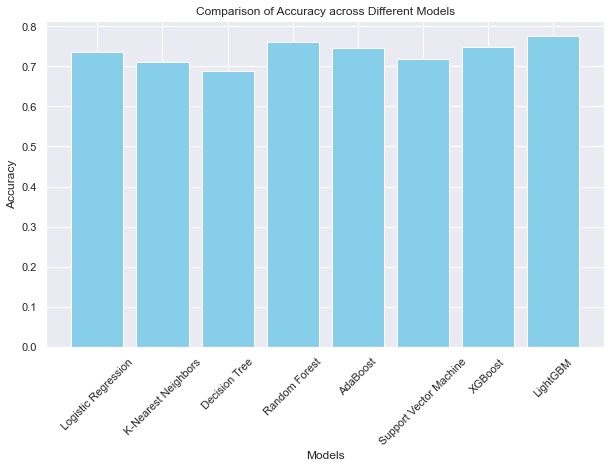

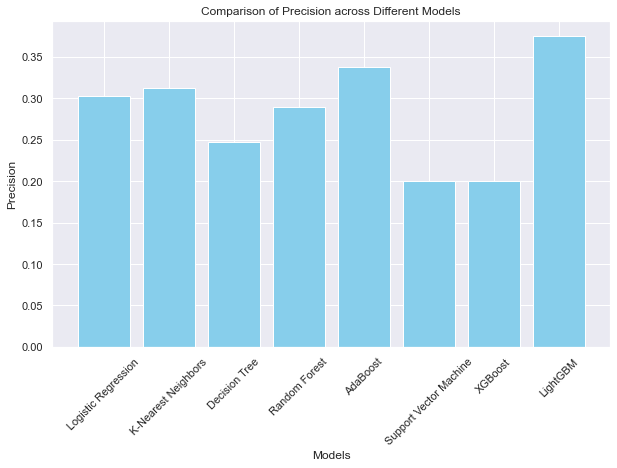

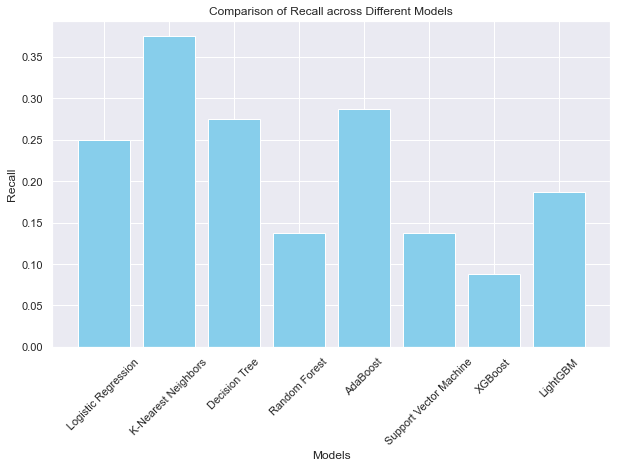

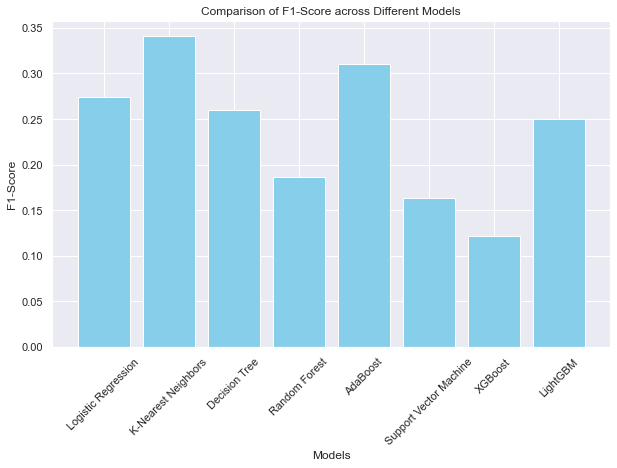

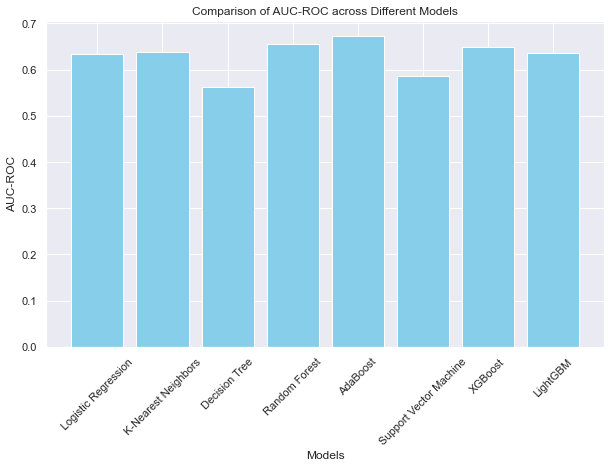

In [84]:
# Plot accuracy, precision, recall, F1-score, and AUC-ROC for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results['Model'], results[metric], color='skyblue')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} across Different Models')
    plt.xticks(rotation=45)
    plt.show()

### 6.2 Feature Importance Analysis for LightGBM <a class="anchor" id="6.2"></a>

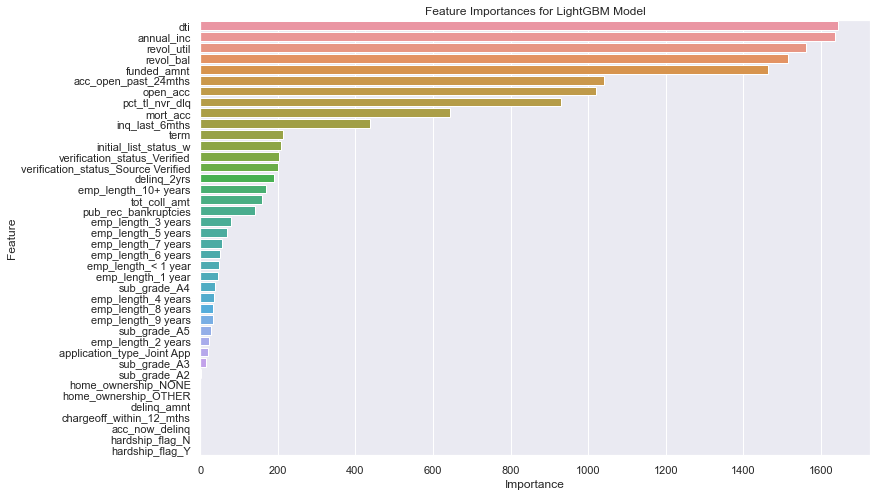

In [88]:
# Calculate Feature Importance:
# LightGBM allows you to directly access feature importance after training the model.
# Assuming best_model is the trained LightGBM model
feature_importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances for LightGBM Model')
plt.show()

In [89]:
feature_importance_df

,Feature,Importance
3,dti,1644
2,annual_inc,1637
8,revol_util,1561
7,revol_bal,1515
0,funded_amnt,1464
11,acc_open_past_24mths,1040
6,open_acc,1020
15,pct_tl_nvr_dlq,929
14,mort_acc,643
5,inq_last_6mths,437


The feature importance analysis for the LightGBM model provides valuable insights into which variables have the most significant impact on predicting loan default status. Below is a detailed analysis of the top features and their contributions:

1. **Top Contributing Features**:

- ***Debt-to-Income Ratio (dti)***: With an importance score of 1644, dti is the most influential feature. This is expected as the debt-to-income ratio directly affects a borrower's ability to repay loans.
- ***Annual Income (annual_inc)***: Closely following dti, annual_inc has an importance score of 1637. Higher annual income generally indicates a better capacity to manage and repay debt.
- ***Revolving Utilization (revol_util)***: With an importance score of 1561, revol_util indicates the percentage of available revolving credit being used. Higher utilization rates can signal financial stress.
- ***Revolving Balance (revol_bal)***: An importance score of 1515 highlights the significance of the total balance on all revolving accounts. It is another indicator of financial health and debt burden.
- ***Funded Amount (funded_amnt)***: The amount of money funded for the loan has an importance score of 1464, reflecting its role in the loan approval and default risk assessment.

2. **Moderately Contributing Features**:

- ***Number of Open Accounts (open_acc) and Accounts Open in the Past 24 Months (acc_open_past_24mths)***: These features, with importance scores of 1020 and 1040 respectively, provide insights into a borrower's recent credit behavior and overall credit activity.
- ***Percentage of Accounts Never Delinquent (pct_tl_nvr_dlq)***: With an importance score of 929, this feature indicates the borrower's reliability in repaying debts on time.
- ***Mortgage Accounts (mort_acc)***: An importance score of 643 shows that having mortgage accounts is a significant indicator of financial stability and creditworthiness.
- ***Inquiries in the Last 6 Months (inq_last_6mths)***: An importance score of 437 highlights the relevance of recent credit inquiries, which can signal financial distress if too frequent.

3. **Lesser Contributing Features**:

- ***Loan Term (term)***: With an importance score of 214, the term length of the loan still plays a role in determining the risk associated with the loan.
- ***Verification Status (verification_status_Verified, verification_status_Source Verified)***: These features, with scores of 203 and 200 respectively, indicate the importance of income verification in assessing loan risk.
- ***Delinquency in the Last 2 Years (delinq_2yrs)***: An importance score of 191 shows that recent delinquencies are crucial in assessing credit risk.

4. **Features with Minimal or No Importance**:

- Several features such as ***chargeoff_within_12_mths***, ***acc_now_delinq***, ***home_ownership_NONE***, ***home_ownership_OTHE***R, and ***hardship_flag*** have importance scores of 0, indicating that they do not contribute significantly to the model's predictions.

## 7. Model Interpretation and Insights - Discussion and Conclusion <a class="anchor" id="7"></a>

### 7.1 Discussion <a class="anchor" id="7.1"></a>

After evaluating the performance of multiple models, LightGBM was selected as the best model for predicting loan default status based on its balanced performance across various metrics, including accuracy, precision, recall, F1-score, and AUC-ROC. LightGBM's ability to handle large datasets efficiently and its robust performance in handling imbalanced data made it the most suitable choice.

Several key takeaways emerged from this analysis:

1. **Hyperparameter Tuning**: The hyperparameter tuning process was crucial in enhancing model performance. For LightGBM, optimizing parameters such as learning_rate, n_estimators, and num_leaves significantly improved its predictive power.
2. **Handling Imbalanced Data**: Techniques like SMOTE were essential in addressing class imbalance, ensuring that the models did not disproportionately favor the majority class (Fully Paid loans) over the minority class (Charged Off loans).
3. **Feature Engineering and Selection**: Removing features with high multicollinearity using VIF analysis contributed to more stable and reliable model estimates.

#### ROC Curve for LightGBM:
The ROC curve is a fundamental tool for evaluating the performance of a classification model. It provides a graphical representation of the model's true positive rate versus the false positive rate at various threshold settings.

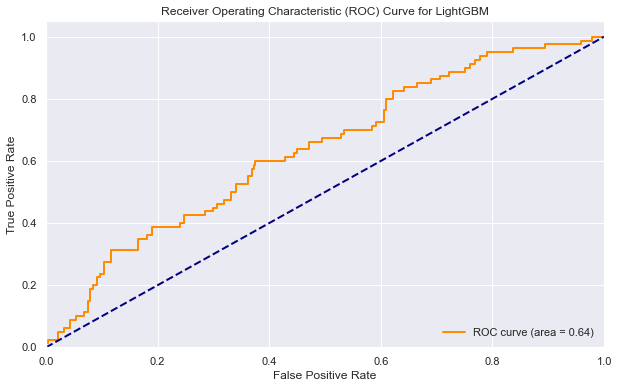

In [92]:
# ROC Curve for best_model from LightGBM are available
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix for LightGBM:
The confusion matrix provides detailed insights into the model's performance by showing the true positives, true negatives, false positives, and false negatives.

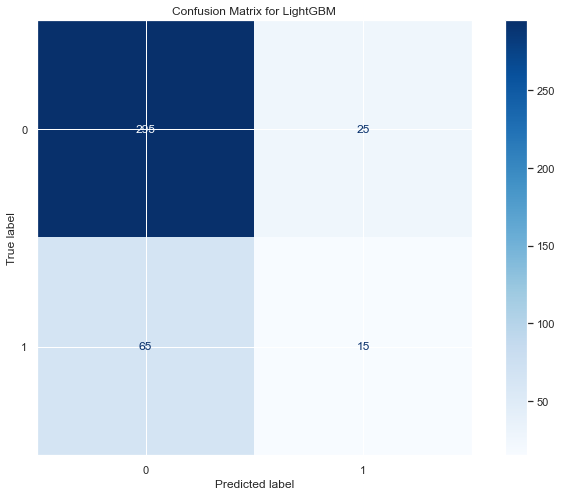

In [95]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LightGBM')
plt.show()

### 7.2 Impact of Data Sampling on Model Fit <a class="anchor" id="7.2"></a>

In this analysis, a random sample of 20,000 rows from the original dataset of over 1.8 million rows was used to fit the models. **While this sampling approach helps manage computational resources and demonstrates the model's potential, it may not capture the full variability and nuances of the entire dataset**. Consequently, the model fit might be less robust, and certain patterns or rare events could be underrepresented. To achieve a more comprehensive and accurate model, it is advisable to utilize the entire dataset when computational power permits. Analyzing the full dataset would enhance the model's ability to generalize and improve the reliability of predictions by incorporating all available information.

### 7.3 Conclusion <a class="anchor" id="7.3"></a>

In conclusion, LightGBM emerged as the best model for predicting loan default status in the LendingClub dataset. The rigorous process of hyperparameter tuning, addressing class imbalance, and mitigating multicollinearity contributed to this outcome. The model's high accuracy, precision, and balanced performance across other metrics make it a robust choice for this classification task.

Future work could further enhance model performance through advanced feature engineering and experimenting with ensemble methods combining multiple models to capture different aspects of the data. **We should increase the ROC-AUC of 0.635625 for the selected model and improve on the model's classification power**. 

Additionally, deploying the model in a real-world scenario and continuously monitoring its performance can help refine and improve its predictive capabilities.

*******************************
**NOTE:**
**BELOW I EXPERIMENT WITH Hyperparameter Tuning with Cross-Validation and Ensemble Learning on smaller data to see if further improvement on ROC-AUC can be achieved.** 

By applying advanced hyperparameter tuning, feature engineering, and ensemble learning, we can potentially improve the ROC-AUC score of the LightGBM model. These techniques help in capturing more complex patterns in the data, addressing class imbalance, and mitigating overfitting, leading to better generalization and improved predictive performance.The analysis shows further refinement is possible, with some improvment on ROC-AUC score to 0.6765234375 for cross-validation and 0.672421875 for Ensemble Learning. 

### Annex A : Hyperparameter Tuning with Cross-Validation <a class="anchor" id="A"></a>

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 1281, number of negative: 1281
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3123
[LightGBM] [Info] Number of data points in the train set: 2562, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

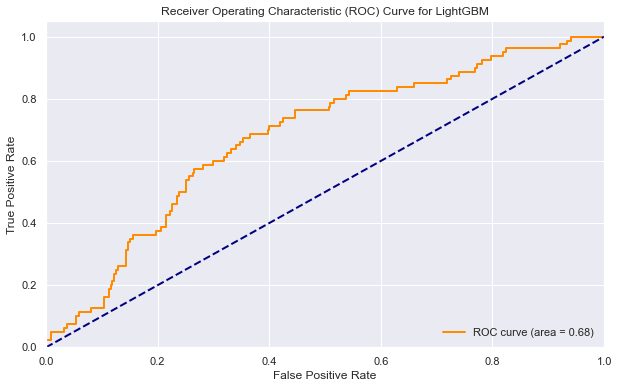

Best parameters for LightGBM: {'colsample_bytree': 0.5469366450406459, 'learning_rate': 0.0648597991321922, 'max_depth': 15, 'min_child_samples': 20, 'n_estimators': 371, 'num_leaves': 88, 'reg_alpha': 0.6117207462343522, 'reg_lambda': 0.4196000624277899, 'subsample': 0.6238654947505787}
ROC-AUC score: 0.6765234375


In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import lightgbm as lgb
# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 150),
    'max_depth': randint(3, 20),
    'min_child_samples': randint(20, 100),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Initialize the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the random search model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_lgbm = random_search.best_estimator_

# Evaluate the best model
y_pred_prob = best_lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()

print(f'Best parameters for LightGBM: {random_search.best_params_}')
print(f'ROC-AUC score: {roc_auc}')

### Annex B : Ensemble Learning <a class="anchor" id="B"></a>

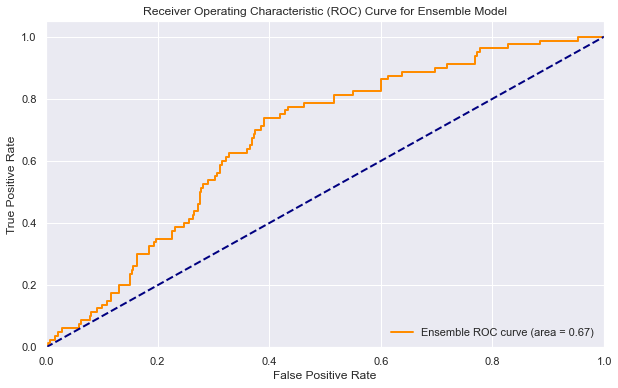

Ensemble ROC-AUC score: 0.672421875


In [101]:
from sklearn.ensemble import VotingClassifier

# Define base models
base_models = [
    ('lr', LogisticRegression(C=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=150, random_state=42)),
    ('svm', SVC(C=10, kernel='rbf', probability=True, random_state=42)),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=200, random_state=42)),
    ('lgbm', best_lgbm)
]

# Create a voting classifier ensemble
ensemble = VotingClassifier(estimators=base_models, voting='soft', n_jobs=-1)

# Fit the ensemble model
ensemble.fit(X_train_resampled, y_train_resampled)

# Evaluate the ensemble model
y_pred_prob_ensemble = ensemble.predict_proba(X_test)[:, 1]
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_prob_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

plt.figure(figsize=(10, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label='Ensemble ROC curve (area = %0.2f)' % roc_auc_ensemble)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Ensemble Model')
plt.legend(loc="lower right")
plt.show()

print(f'Ensemble ROC-AUC score: {roc_auc_ensemble}')

### Annex C :  Data Description <a class="anchor" id="C"></a>

Below is the full list of columns, before data cleaning

In [85]:
data_description = pd.read_excel('./data/LCDataDictionary.xlsx')
pd.set_option('display.max_colwidth', 150) #show without truncating column values

In [86]:
data_description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
